In [1]:
# import
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import pandas as pd
from scipy import signal
from importlib import reload

#import winsound as sd
import pickle
import sys
import os

In [2]:
# load
cd = os.getcwd()
path = os.path.dirname(cd)

In [3]:
with open('Results_SuccessRate_Various_Cond\Results_various_cond.pkl' ,'rb') as file:
    Success_bM_list0 = pickle.load(file)
    Success_bG_list0 = pickle.load(file)
    
    Success_oM_list0 = pickle.load(file)
    Success_oG_list0 = pickle.load(file)
    
    Success_sM_list0 = pickle.load(file)
    Success_sG_list0 = pickle.load(file)
    
    size_biasM_list0 = pickle.load(file)
    size_biasG_list0 = pickle.load(file)
    
    Success_cM_list0 = pickle.load(file)
    Success_cG_list0 = pickle.load(file)

In [4]:
with open('Results_SuccessRate_Various_Cond\Results_various_cond2.pkl' ,'rb') as file:
    Success_bM_list1 = pickle.load(file)
    Success_bG_list1 = pickle.load(file)
    
    Success_oM_list1 = pickle.load(file)
    Success_oG_list1 = pickle.load(file)
    
    Success_sM_list1 = pickle.load(file)
    Success_sG_list1 = pickle.load(file)
    
    size_biasM_list1 = pickle.load(file)
    size_biasG_list1 = pickle.load(file)
    
    Success_cM_list1 = pickle.load(file)
    Success_cG_list1 = pickle.load(file)

In [5]:
with open('Results_SuccessRate_Various_Cond\Results_various_cond3.pkl' ,'rb') as file:
    Success_bM_list2 = pickle.load(file)
    Success_bG_list2 = pickle.load(file)
    
    Success_oM_list2 = pickle.load(file)
    Success_oG_list2 = pickle.load(file)
    
    Success_sM_list2 = pickle.load(file)
    Success_sG_list2 = pickle.load(file)
    
    size_biasM_list2 = pickle.load(file)
    size_biasG_list2 = pickle.load(file)
    
    Success_cM_list2 = pickle.load(file)
    Success_cG_list2 = pickle.load(file)

In [6]:
Success_bM_F = []
Success_bM_F_list = []
for n in range(5):
    temp = Success_bM_list0[5*n:5*(n+1)] + Success_bM_list1[5*n:5*(n+1)] + Success_bM_list2[5*n:5*(n+1)]
    Success_bM_F_list += temp
    Success_bM_F.append(np.mean(temp))
Success_bG_F = []
Success_bG_F_list = []
for n in range(5):
    temp = Success_bG_list0[5*n:5*(n+1)] + Success_bG_list1[5*n:5*(n+1)] + Success_bG_list2[5*n:5*(n+1)]
    Success_bG_F_list += temp
    Success_bG_F.append(np.mean(temp))    

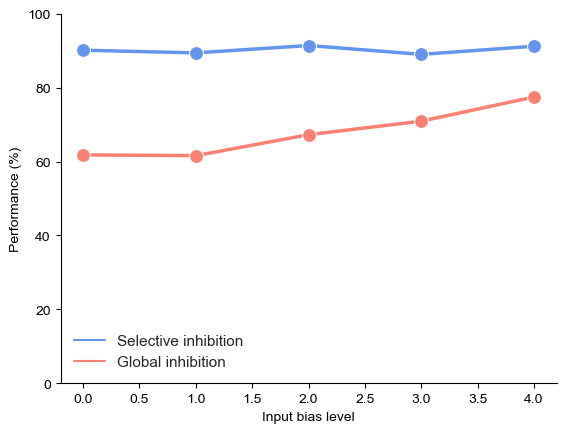

In [7]:
data_dic = {}
data_dic['Input bias level'] = [0,1,2,3,4,0,1,2,3,4]
data_dic['Selective inhibition / Global inhibition'] = []
for n in range(5):
    data_dic['Selective inhibition / Global inhibition'].append('Selective inhibition')
for n in range(5):
    data_dic['Selective inhibition / Global inhibition'].append('Global inhibition')

data_dic['Performance (%)'] = np.array(Success_bM_F+Success_bG_F)

df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='Input bias level', y='Performance (%)', marker='o', markersize=10, palette={'Selective inhibition':'cornflowerblue','Global inhibition':'salmon'}, hue=df['Selective inhibition / Global inhibition'], linewidth=2.5)
plt.legend(loc='lower left', frameon=False)
plt.ylim([0,100])
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-Input biasf.png', bbox_inches='tight')
plt.show()

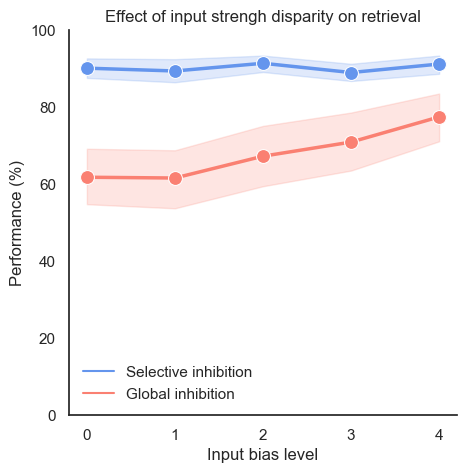

In [8]:
data_dic = {}
data_dic['Input bias level'] = []
for n in range(5*2):
    m = n % 5
    data_dic['Input bias level'] += [m,m,m,m,m]+[m,m,m,m,m]+[m,m,m,m,m]
data_dic['Selective inhibition / Global inhibition'] = []
for n in range(3*5*5):
    data_dic['Selective inhibition / Global inhibition'].append('Selective inhibition')
for n in range(3*5*5):
    data_dic['Selective inhibition / Global inhibition'].append('Global inhibition')

data_dic['Performance (%)'] = Success_bM_F_list+Success_bG_F_list

df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='Input bias level', y='Performance (%)', marker='o', markersize=10, palette={'Selective inhibition':'cornflowerblue','Global inhibition':'salmon'}, hue=df['Selective inhibition / Global inhibition'], linewidth=2.5)
plt.legend(loc='lower left', frameon=False)
plt.ylim([0,100])
plt.title('Effect of input strengh disparity on retrieval')
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-Input biasf.pdf', bbox_inches='tight')
plt.savefig('Fig-Input biasf.tiff', bbox_inches='tight', dpi=300)
plt.show()

In [9]:
def cal_overlap(total,A,B):
    if (len(A)+len(B)) !=0:
        output = len(A-(total- B))*2 / (len(A)+len(B))
    else:
        output = 0
    return output

In [10]:
# load
cd = os.getcwd()
path = os.path.dirname(cd)

with open(path+'//Data_final16-CA3.pkl', 'rb') as file:
    Filt_idata = pickle.load(file)
    Filt_gdata = pickle.load(file)
    Filt_glen = pickle.load(file)
    F_DataLen = pickle.load(file)
    
    Af_py = pickle.load(file)
    Af_in = pickle.load(file)
    
    In_py_list = pickle.load(file)
    In_in_list = pickle.load(file)

In [11]:
with open(path+'//Data_final16_v2-CA3.pkl', 'rb') as file:
    Filt_idata_v2 = pickle.load(file)
    Filt_gdata_v2 = pickle.load(file)
    Filt_glen_v2 = pickle.load(file)
    F_DataLen_v2 = pickle.load(file)
    
    Af_py_v2 = pickle.load(file)
    Af_in_v2 = pickle.load(file)
    
    In_py_list_v2 = pickle.load(file)
    In_in_list_v2 = pickle.load(file)

In [12]:
# overlap 0
Target_temp0 = [[0, 12], [212,383], [37, 392], [199, 426], [129, 132]]
# overlap 1 / 0.5 - 1
Target_temp1 = [[1, 49], [14,275], [50, 274], [132, 404], [180, 219]]
# overlap 2 / 1 - 1.5
Target_temp2 = [[36, 123], [123,323], [134, 450], [207, 377], [323, 377]]
# overlap 3 / 1.5 - 2
Target_temp3 = [[29, 209], [49,382], [63, 240], [239, 240], [63, 388]]
# overlap 4 / 2 - 2.5
Target_temp4 = [[4, 73], [14,180], [73, 77], [80, 271], [180, 422]]
# overlap 5 / 2.5 - 3
Target_temp5 = [[31, 292], [63,233], [108, 324], [292, 411], [292, 426]]

In [13]:
Target_Data1 = []
for n in range(6):
    Target_Data1 += globals()["Target_temp{}".format(n)]

In [14]:
with open('Cue_and_Target_Overlap_v2.pkl', 'rb') as file:
    Target_Data2 = pickle.load(file)
    Cue_Data2 = pickle.load(file)

In [15]:
with open('Cue_and_Target_Overlap_v4.pkl', 'rb') as file:
    Target_Data3 = pickle.load(file)
    Cue_Data3 = pickle.load(file)

In [16]:
CA3_overlap_list_total = []
for i in range(3):
    CA3_overlap_list = []
    for n in range(6):
        overlap_temp = []
        for m in range(5):
            comp = globals()["Target_Data{}".format(i+1)][5*n+m]
            if i == 1:
                overlap_temp.append(cal_overlap(set(range(2400)), set(Af_py_v2[comp[0]]), set(Af_py_v2[comp[1]])))
            else:
                overlap_temp.append(cal_overlap(set(range(2400)), set(Af_py[comp[0]]), set(Af_py[comp[1]])))
        CA3_overlap_list.append(overlap_temp)
    CA3_overlap_list_total.append(CA3_overlap_list)

In [17]:
CA3_overlap_mean = []
for n in range(4):
    if n == 0:
        temp = []
        for m in range(3):
            temp += CA3_overlap_list_total[m][n]
        CA3_overlap_mean.append(np.mean(temp))
    elif n == 1:
        temp = []
        for m in range(3):
            temp += CA3_overlap_list_total[m][n]+CA3_overlap_list_total[m][n+1]
        CA3_overlap_mean.append(np.mean(temp))
    elif n == 2:
        temp = []
        for m in range(3):
            temp += CA3_overlap_list_total[m][n+1]+CA3_overlap_list_total[m][n+2]
        CA3_overlap_mean.append(np.mean(temp))
    elif n == 3:
        temp = []
        for m in range(3):
            temp += CA3_overlap_list_total[m][n+2]
        CA3_overlap_mean.append(np.mean(temp))

In [18]:
CA3_overlap_mean

[0.0, 0.09039681565997354, 0.20658230658230659, 0.29044091710758374]

In [19]:
Success_oM_F = []
Success_oM_F_list = []
for n in range(6):
    temp = Success_oM_list0[5*n:5*(n+1)] + Success_oM_list1[5*n:5*(n+1)] + Success_oM_list2[5*n:5*(n+1)]
    Success_oM_F_list += temp
    Success_oM_F.append(np.mean(temp))
Success_oG_F = []
Success_oG_F_list = []
for n in range(6):
    temp = Success_oG_list0[5*n:5*(n+1)] + Success_oG_list1[5*n:5*(n+1)] + Success_oG_list2[5*n:5*(n+1)]
    Success_oG_F_list += temp
    Success_oG_F.append(np.mean(temp))   

In [20]:
# 15 15 15 15 15 15

In [21]:
Success_oM_F = []
for n in range(4):
    if n == 0:
        temp = Success_oM_F_list[15*n:15*(n+1)]
        Success_oM_F.append(np.mean(temp))
    elif n == 1:
        temp = Success_oM_F_list[15*n:15*(n+1)]+Success_oM_F_list[15*(n+1):15*(n+2)]
        Success_oM_F.append(np.mean(temp))
    elif n == 2:
        temp = Success_oM_F_list[15*(n+1):15*(n+1+1)]+Success_oM_F_list[15*(n+2):15*(n+2+1)]
        Success_oM_F.append(np.mean(temp))
    elif n == 3:
        temp = Success_oM_F_list[15*(n+2):15*(n+2+1)]
        Success_oM_F.append(np.mean(temp))

In [22]:
Success_oG_F = []
Success_oG_F_std = []
for n in range(4):
    if n == 0:
        temp = Success_oG_F_list[15*n:15*(n+1)]
        Success_oG_F.append(np.mean(temp))
        Success_oG_F_std.append(np.std(temp))
    elif n == 1:
        temp = Success_oG_F_list[15*n:15*(n+1)]+Success_oG_F_list[15*(n+1):15*(n+2)]
        Success_oG_F.append(np.mean(temp))
        Success_oG_F_std.append(np.std(temp))
    elif n == 2:
        temp = Success_oG_F_list[15*(n+1):15*(n+1+1)]+Success_oG_F_list[15*(n+2):15*(n+2+1)]
        Success_oG_F.append(np.mean(temp))
        Success_oG_F_std.append(np.std(temp))
    elif n == 3:
        temp = Success_oG_F_list[15*(n+2):15*(n+2+1)]
        Success_oG_F.append(np.mean(temp))
        Success_oG_F_std.append(np.std(temp))

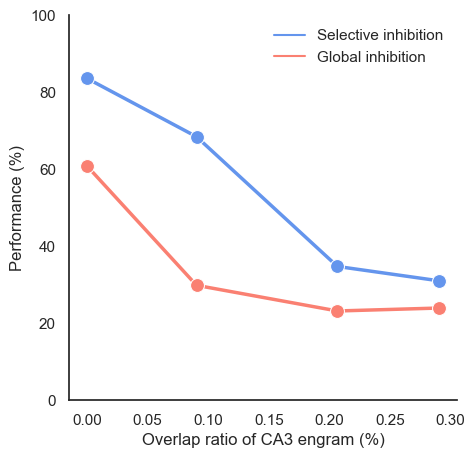

In [23]:
data_dic = {}
data_dic['Overlap ratio of CA3 engram (%)'] = CA3_overlap_mean+CA3_overlap_mean
data_dic['Selective inhibition / Global inhibition'] = []
for n in range(4):
    data_dic['Selective inhibition / Global inhibition'].append('Selective inhibition')
for n in range(4):
    data_dic['Selective inhibition / Global inhibition'].append('Global inhibition')

data_dic['Performance (%)'] = np.array(Success_oM_F+Success_oG_F)

df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='Overlap ratio of CA3 engram (%)', y='Performance (%)', marker='o', markersize=10, 
                  palette={'Selective inhibition':'cornflowerblue','Global inhibition':'salmon'}, 
                  hue=df['Selective inhibition / Global inhibition'], linewidth=2.5)
plt.legend(loc='upper right', frameon=False)
plt.ylim([0,100])
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-Overlapf.png', bbox_inches='tight')
plt.show()

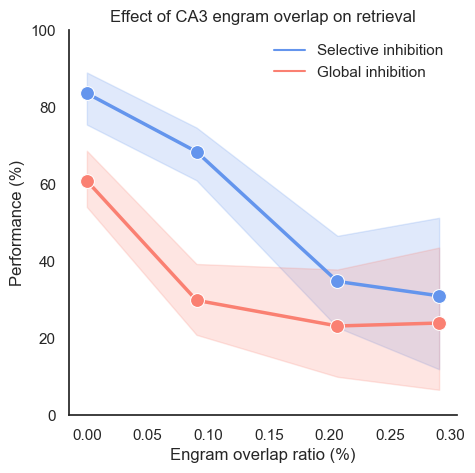

In [24]:
data_dic = {}
data_dic['Engram overlap ratio (%)'] = []
for n in range(4*2):
    m = n % 4
    if m == 0 or m == 3:
        for k in range(3):
            data_dic['Engram overlap ratio (%)'] += [CA3_overlap_mean[m],CA3_overlap_mean[m],CA3_overlap_mean[m],CA3_overlap_mean[m],CA3_overlap_mean[m]]
    elif m == 1 or m == 2:
        for k in range(6):
            data_dic['Engram overlap ratio (%)'] += [CA3_overlap_mean[m],CA3_overlap_mean[m],CA3_overlap_mean[m],CA3_overlap_mean[m],CA3_overlap_mean[m]]
data_dic['Selective inhibition / Global inhibition'] = []
for n in range(3*5*6):
    data_dic['Selective inhibition / Global inhibition'].append('Selective inhibition')
for n in range(3*5*6):
    data_dic['Selective inhibition / Global inhibition'].append('Global inhibition')

data_dic['Performance (%)'] = Success_oM_F_list+Success_oG_F_list

df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='Engram overlap ratio (%)', y='Performance (%)', marker='o', markersize=10,
                  palette={'Selective inhibition':'cornflowerblue','Global inhibition':'salmon'},
                  hue=df['Selective inhibition / Global inhibition'], linewidth=2.5)
plt.legend(loc='upper right', frameon=False)
plt.ylim([0,100])
plt.title('Effect of CA3 engram overlap on retrieval')
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-Overlapf.pdf', bbox_inches='tight')
plt.savefig('Fig-Overlapf.tiff', bbox_inches='tight', dpi=300)
plt.show()

In [25]:
Success_sM_F = []
Success_sM_F_list = []
for n in range(5):
    temp = Success_sM_list0[5*n:5*(n+1)] + Success_sM_list1[5*n:5*(n+1)] + Success_sM_list2[5*n:5*(n+1)]
    Success_sM_F_list += temp
    Success_sM_F.append(np.mean(temp))
Success_sG_F = []
Success_sG_F_list = []
for n in range(5):
    temp = Success_sG_list0[5*n:5*(n+1)] + Success_sG_list1[5*n:5*(n+1)] + Success_sG_list2[5*n:5*(n+1)]
    Success_sG_F_list += temp
    Success_sG_F.append(np.mean(temp))    

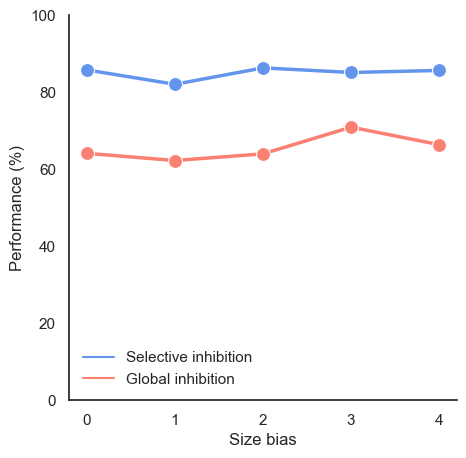

In [26]:
data_dic = {}
data_dic['Size bias'] = [0,1,2,3,4,0,1,2,3,4]
data_dic['Selective inhibition / Global inhibition'] = []
for n in range(5):
    data_dic['Selective inhibition / Global inhibition'].append('Selective inhibition')
for n in range(5):
    data_dic['Selective inhibition / Global inhibition'].append('Global inhibition')

data_dic['Performance (%)'] = np.array(Success_sM_F+Success_sG_F)

df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='Size bias', y='Performance (%)', marker='o', markersize=10, palette={'Selective inhibition':'cornflowerblue','Global inhibition':'salmon'}, hue=df['Selective inhibition / Global inhibition'], linewidth=2.5)
plt.legend(loc='lower left', frameon=False)
plt.ylim([0,100])
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-Sizef.png', bbox_inches='tight')
plt.show()

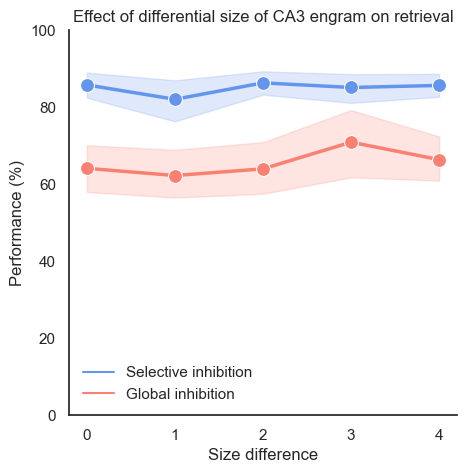

In [27]:
data_dic = {}
data_dic['Size difference'] = []
for n in range(5*2):
    m = n % 5
    data_dic['Size difference'] += [m,m,m,m,m]+[m,m,m,m,m]+[m,m,m,m,m]
data_dic['Selective inhibition / Global inhibition'] = []
for n in range(3*5*5):
    data_dic['Selective inhibition / Global inhibition'].append('Selective inhibition')
for n in range(3*5*5):
    data_dic['Selective inhibition / Global inhibition'].append('Global inhibition')

data_dic['Performance (%)'] = Success_sM_F_list+Success_sG_F_list

df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='Size difference', y='Performance (%)', marker='o', markersize=10, palette={'Selective inhibition':'cornflowerblue','Global inhibition':'salmon'}, hue=df['Selective inhibition / Global inhibition'], linewidth=2.5)
plt.legend(loc='lower left', frameon=False)
plt.ylim([0,100])
plt.title('Effect of differential size of CA3 engram on retrieval')
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-Sizef.pdf', bbox_inches='tight')
plt.savefig('Fig-Sizef.tiff', bbox_inches='tight', dpi=300)
plt.show()

In [28]:
size_biasM_F = []
size_biasM_F_list = []
for n in range(5):
    temp = size_biasM_list0[5*n:5*(n+1)] + size_biasM_list1[5*n:5*(n+1)] + size_biasM_list2[5*n:5*(n+1)]
    size_biasM_F_list += temp
    size_biasM_F.append(np.mean(temp))
size_biasG_F = []
size_biasG_F_list = []
for n in range(5):
    temp = size_biasG_list0[5*n:5*(n+1)] + size_biasG_list1[5*n:5*(n+1)] + size_biasG_list2[5*n:5*(n+1)]
    size_biasG_F_list += temp
    size_biasG_F.append(np.mean(temp))  

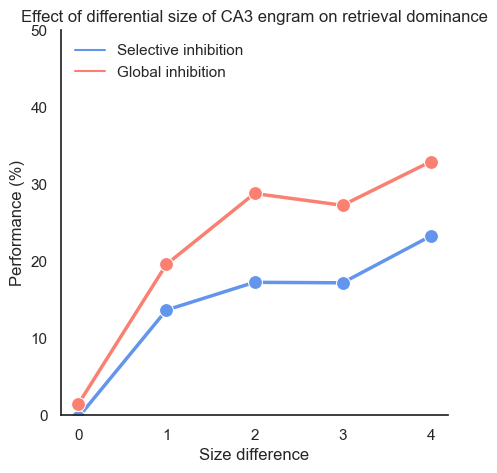

In [29]:
data_dic = {}
data_dic['Size difference'] = [0,1,2,3,4,0,1,2,3,4]
data_dic['Selective inhibition / Global inhibition'] = []
for n in range(5):
    data_dic['Selective inhibition / Global inhibition'].append('Selective inhibition')
for n in range(5):
    data_dic['Selective inhibition / Global inhibition'].append('Global inhibition')

data_dic['Performance (%)'] = size_biasM_F+size_biasG_F

df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='Size difference', y='Performance (%)', marker='o', markersize=10, palette={'Selective inhibition':'cornflowerblue','Global inhibition':'salmon'}, hue=df['Selective inhibition / Global inhibition'], linewidth=2.5)
plt.legend(loc='upper left', frameon=False)
plt.ylim([0,50])
plt.title('Effect of differential size of CA3 engram on retrieval dominance')
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-Size_biasf.png', bbox_inches='tight')
plt.show()

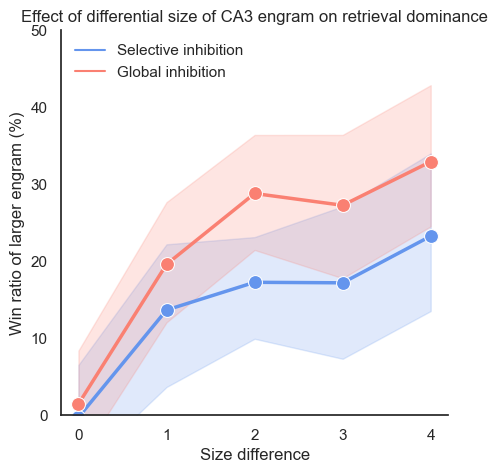

In [30]:
data_dic = {}
data_dic['Size difference'] = []
for n in range(5*2):
    m = n % 5
    data_dic['Size difference'] += [m,m,m,m,m]+[m,m,m,m,m]+[m,m,m,m,m]
data_dic['Selective inhibition / Global inhibition'] = []
for n in range(3*5*5):
    data_dic['Selective inhibition / Global inhibition'].append('Selective inhibition')
for n in range(3*5*5):
    data_dic['Selective inhibition / Global inhibition'].append('Global inhibition')
    
data_dic['Win ratio of larger engram (%)'] = size_biasM_F_list+size_biasG_F_list
df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='Size difference', y='Win ratio of larger engram (%)', marker='o', markersize=10, palette={'Selective inhibition':'cornflowerblue','Global inhibition':'salmon'}, hue=df['Selective inhibition / Global inhibition'], linewidth=2.5)
plt.legend(loc='upper left', frameon=False)
plt.ylim([0,50])
plt.title('Effect of differential size of CA3 engram on retrieval dominance')
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-Size_biasf.pdf', bbox_inches='tight')
plt.savefig('Fig-Size_biasf.tiff', bbox_inches='tight', dpi=300)
plt.show()

In [31]:
Success_cM_F = []
Success_cM_F_list = []
for n in range(5):
    temp = Success_cM_list0[5*n:5*(n+1)] + Success_cM_list1[5*n:5*(n+1)] + Success_cM_list2[5*n:5*(n+1)]
    Success_cM_F_list += temp
    Success_cM_F.append(np.mean(temp))
Success_cG_F = []
Success_cG_F_list = []
for n in range(5):
    temp = Success_cG_list0[5*n:5*(n+1)] + Success_cG_list1[5*n:5*(n+1)] + Success_cG_list2[5*n:5*(n+1)]
    Success_cG_F_list += temp
    Success_cG_F.append(np.mean(temp))    

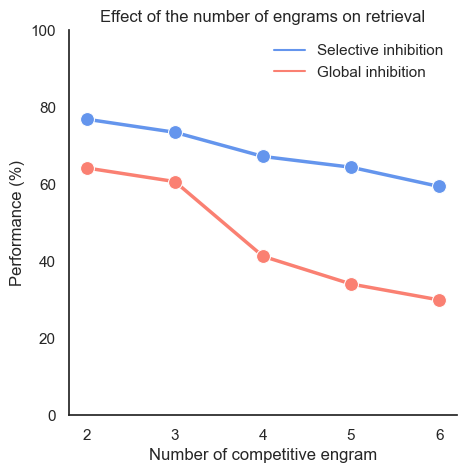

In [32]:
data_dic = {}
data_dic['Number of competitive engram'] = [2,3,4,5,6]+[2,3,4,5,6]
data_dic['Selective inhibition / Global inhibition'] = []
for n in range(5):
    data_dic['Selective inhibition / Global inhibition'].append('Selective inhibition')
for n in range(5):
    data_dic['Selective inhibition / Global inhibition'].append('Global inhibition')

data_dic['Performance (%)'] = np.array(Success_cM_F+Success_cG_F)

df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='Number of competitive engram', y='Performance (%)', marker='o', markersize=10, palette={'Selective inhibition':'cornflowerblue','Global inhibition':'salmon'}, hue=df['Selective inhibition / Global inhibition'], linewidth=2.5)
plt.legend(loc='upper right', frameon=False)
plt.ylim([0,100])
plt.title('Effect of the number of engrams on retrieval')
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-Compf.png', bbox_inches='tight')
plt.show()

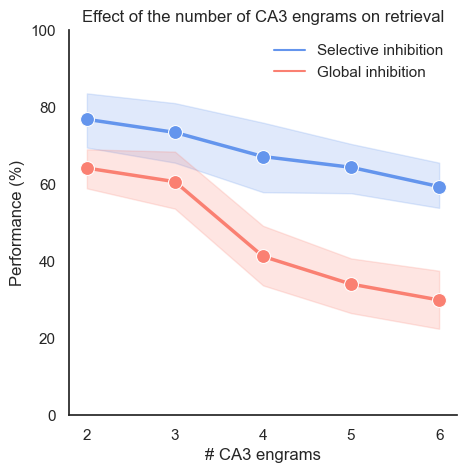

In [33]:
data_dic = {}
data_dic['# CA3 engrams'] = []
for n in range(5*2):
    m = n % 5
    data_dic['# CA3 engrams'] += [m+2,m+2,m+2,m+2,m+2]+[m+2,m+2,m+2,m+2,m+2]+[m+2,m+2,m+2,m+2,m+2]
data_dic['Selective inhibition / Global inhibition'] = []
for n in range(3*5*5):
    data_dic['Selective inhibition / Global inhibition'].append('Selective inhibition')
for n in range(3*5*5):
    data_dic['Selective inhibition / Global inhibition'].append('Global inhibition')

data_dic['Performance (%)'] = Success_cM_F_list+Success_cG_F_list

df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='# CA3 engrams', y='Performance (%)', marker='o', markersize=10, palette={'Selective inhibition':'cornflowerblue','Global inhibition':'salmon'}, hue=df['Selective inhibition / Global inhibition'], linewidth=2.5)
plt.legend(loc='upper right', frameon=False)
plt.ylim([0,100])
plt.title('Effect of the number of CA3 engrams on retrieval')
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-Compf.pdf', bbox_inches='tight')
plt.savefig('Fig-Compf.tiff', bbox_inches='tight', dpi=300)
plt.show()